## Homework 5 Dimensionality Reduction and Clustering
### Matt Oehler
___

In [87]:
#import libraries and datasets
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn import metrics


import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

### Problem 1:

In [88]:
mnist = fetch_mldata("MNIST original")
X = mnist.data / 255.0
y = mnist.target

#also make a train and test set
train_img, test_img, train_lbl, test_lbl = train_test_split( mnist.data, mnist.target, test_size=1/7.0, random_state=0)

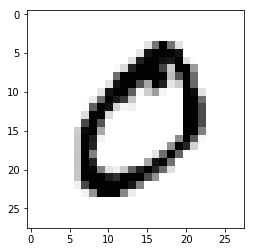

In [3]:
#preview some of the images
plt.imshow(X[0].reshape(28,28), cmap=plt.get_cmap('Greys'))
plt.show()
# plt.imshow(X[50000].reshape(28,28), cmap=plt.get_cmap('gray'))
# plt.show()

## 1. Use PCA to reduce the dimensionality

PCA requires that the data are centered and scaled. I use the StandardScalar class from SKlearn to do this here, and plot an example of a 'scaled' image.

In [ ]:
#scale data and plot a sample scaled image
# X_scaled = StandardScaler().fit_transform(train_img)
# plt.imshow(X_scaled[0].reshape(28,28), cmap=plt.get_cmap('Greys'))
# plt.show()

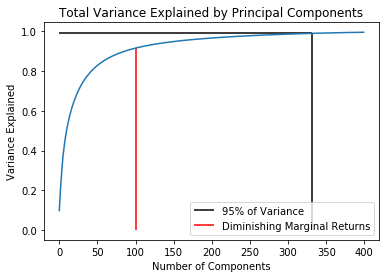

In [4]:
#PCA for MNIST
pca = PCA(n_components=400)
# X_pca = pca.fit_transform(X_scaled)
X_pca = pca.fit_transform(train_img)
# X_pca = pca.fit(X_scaled)
cum_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(len(cum_ratio)), cum_ratio)
plt.title("Total Variance Explained by Principal Components")
plt.xlabel("Number of Components")
plt.ylabel("Variance Explained")
plt.vlines(ymin=0,ymax=cum_ratio[331],x=331,
           label='95% of Variance')
plt.vlines(ymin=0,ymax=cum_ratio[100],x=100,
           label='Diminishing Marginal Returns',color = 'red')
plt.hlines(xmin=0,y=cum_ratio[331],xmax=331)
plt.legend()
plt.show()

In [ ]:
# np.where(cum_ratio >= 0.95)[0]
np.argmax(cum_ratio >= 0.95)

In [89]:
X_pca2 = pca.fit(train_img)

In [92]:
X_pca2.components_.shape

(50, 784)


    a. How many components did you use? Why?
        - I used 332 principal components since that retains 95% of the variance of the original data.
        
        
    b. Plot the first two components. Do you notice any trends? What is this plot showing us?
    - The variance should be getting smaller as we go from component to component. (Note the change in the limits of the x-axis). The plot gives us a visual of the variance that is being captured by each component.
    
    c. Why would you use PCA? What is it doing? And what are the drawbacks?
        - PCA is useful in reducing the negative effects of the curse of dimensionality. You can use it to reduce the number of dimensions of your data such that for each dimension you take out, you lose the minimum amount of information contained in the data. (This is done by having each component maximize the amount of variance retained by the data). One of the main drawbacks of PCA is the loss of data/model interpretibility.
    
    d. Plot some of the images, then compress them using PCA and plot again. How does it look?
    

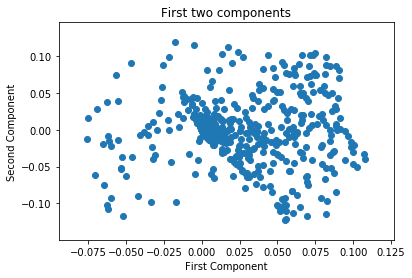

Variance for first two components: [0.09776774 0.07160077]


In [94]:
#plot first two prinipal components
# plt.scatter(X_pca[0],np.zeros(len(X_pca[0])))
# plt.title("First Principal Componenet")
# plt.show()
# plt.scatter(X_pca[1],np.zeros(len(X_pca[1])))
# plt.title("Second Principal Componenet")
# plt.show()
#plot them vs each other
plt.scatter(X_pca2.components_[0],X_pca2.components_[1])
plt.title("First two components")
plt.xlabel("First Component")
plt.ylabel("Second Component")
plt.show()


print("Variance for first two components:",pca.explained_variance_ratio_[:2])


In [84]:
print("first:",np.var(X_pca[0]))
print("second:",np.var(X_pca[1]))
print("300th:",np.var(X_pca[299]))

for i in range(X_pca.shape[0]):
    print(i, np.var(X_pca[i]))
    if(i >20):
        break

first: 1.0272452726490209
second: 1.1585999272317193
300th: 1.4234085782722272
0 1.0272452726490209
1 1.1585999272317193
2 1.0064721469767353
3 1.0660015819939743
4 1.674144673601785
5 1.5842945137630777
6 1.5224165575934656
7 1.09276099556961
8 1.1824334016956644
9 1.0483071008775051
10 1.0873046818162309
11 1.303837753242352
12 1.0981938273471805
13 1.2151896000459634
14 1.5453891372781996
15 0.8143405439078536
16 1.5125137342102262
17 1.818539791195437
18 1.0964173637790684
19 1.0409464397166905
20 1.0574774234848225
21 1.5504041305666332


In [ ]:
#make image from PCA data

#original
X_scaled = StandardScaler().fit_transform(train_img)
plt.subplot(1, 2, 1);
plt.imshow(X_scaled[0].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.show()

#reconstruced from PCA with 300 components
pca_300 = PCA(n_components=300)
x_300 = pca_300.fit_transform(X_scaled)

approximate_image = pca.inverse_transform(x_300)
plt.subplot(1, 2, 2);
plt.imshow(approximate_image[1].reshape(28, 28),
              cmap = plt.get_cmap('gray'))
plt.xlabel('300 components')
plt.title('Image with 300 Principal Components');

## t-SNE


In [9]:
#first reduce dimensionality before feeding to t-sne
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X)

rows = np.arange(70000)
np.random.shuffle(rows)
n_select = 9000

tsne = TSNE(n_components=2, verbose=1, perplexity=45, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

[t-SNE] Computing 136 nearest neighbors...
[t-SNE] Indexed 9000 samples in 0.047s...
[t-SNE] Computed neighbors for 9000 samples in 12.671s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9000
[t-SNE] Computed conditional probabilities for sample 2000 / 9000
[t-SNE] Computed conditional probabilities for sample 3000 / 9000
[t-SNE] Computed conditional probabilities for sample 4000 / 9000
[t-SNE] Computed conditional probabilities for sample 5000 / 9000
[t-SNE] Computed conditional probabilities for sample 6000 / 9000
[t-SNE] Computed conditional probabilities for sample 7000 / 9000
[t-SNE] Computed conditional probabilities for sample 8000 / 9000
[t-SNE] Computed conditional probabilities for sample 9000 / 9000
[t-SNE] Mean sigma: 1.897821
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.274368
[t-SNE] Error after 1000 iterations: 1.662255


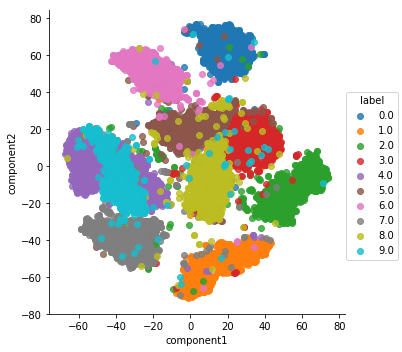

In [19]:
df_tsne = pd.DataFrame(tsne_results, columns=['component1', 'component2'])
df_tsne['label'] = y[rows[:n_select]]
#plot it
sns.lmplot(x='component1', y='component2', data=df_tsne, hue='label', fit_reg=False)

In [20]:
#different perplexity
tsne = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 9000 samples in 0.058s...
[t-SNE] Computed neighbors for 9000 samples in 10.967s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9000
[t-SNE] Computed conditional probabilities for sample 2000 / 9000
[t-SNE] Computed conditional probabilities for sample 3000 / 9000
[t-SNE] Computed conditional probabilities for sample 4000 / 9000
[t-SNE] Computed conditional probabilities for sample 5000 / 9000
[t-SNE] Computed conditional probabilities for sample 6000 / 9000
[t-SNE] Computed conditional probabilities for sample 7000 / 9000
[t-SNE] Computed conditional probabilities for sample 8000 / 9000
[t-SNE] Computed conditional probabilities for sample 9000 / 9000
[t-SNE] Mean sigma: 1.367950
[t-SNE] KL divergence after 250 iterations with early exaggeration: 90.519058
[t-SNE] Error after 1000 iterations: 1.855287


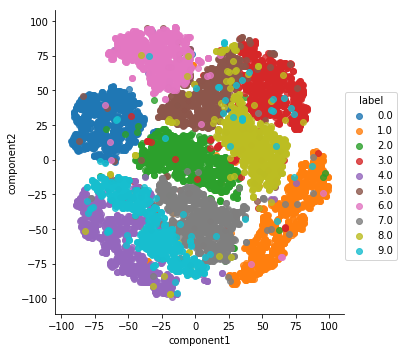

In [22]:
df_tsne = pd.DataFrame(tsne_results, columns=['component1', 'component2'])
df_tsne['label'] = y[rows[:n_select]]
#plot it
sns.lmplot(x='component1', y='component2', data=df_tsne, hue='label', fit_reg=False)

## K-Means Clustering

3. Perform k-means clustering:

    a. How did you choose k?
    - We know that there are 10 different digits to classify. This makes it easy to choose K, becuase we want 1 cluster per digit.
    
    b. How did you evaluate your clustering?
    - I used 4 different metrics to evaluate the my clustering. I specifically chose to use these metrics because they incorporate knowlege of the "ground truth" or in other words, knowlege of the true labels. Since we have access to this, I felt that they would be the best metrics. In an industry setting where we didn't have access to the ground truth then something like the Silhouette Coefficient would be a better metric.
    
    c. Visualize your clusters using t-sne
    - ???
    
    d. Did you scale your data?
    - I chose to not scale the data since all of the features are on the same scale (the measure the grayness of a particular pixel). More thorough testing of whether or not it is beneficial to scale the data could be done for this, but since my initial results weren't terrible, I just decided to stick with them. 
    
    e. How robust is your clustering?
    - The clustering seems to be pretty robust. In general, by increaseing the n_init parameter for K-Means clustering you can increase the robustness of the algorithm. The n_init parameter is the number of times the algorithm will re-do the clustering algorithm with different random starting points. Having a higher number will ensure that your overall results converge to the best clusters.

In [18]:
#we know there are 10 different digits, so we want 10 clusters
kmeans = KMeans(n_clusters=10, n_init=25, n_jobs=-1)
kmeans.fit(train_img)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=25, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [35]:
#adjusted rand index (needs truth)
pred_labels = kmeans.predict(test_img)
true_labels = test_lbl

ARI = metrics.adjusted_rand_score(true_labels,pred_labels)
print("ARI:", ARI)

#Mutual information based scores
MIBS = metrics.adjusted_mutual_info_score(true_labels, pred_labels)
print("MIBS:", MIBS)

#homogeneity, completeness, and V-measure
homo = metrics.homogeneity_completeness_v_measure(true_labels, pred_labels)
print("Homogeneity, completeness, and V-measure:", np.round(homo,4))

#Fowlkes-Mallows scores (results in a NaN)
# fowlkes = metrics.fowlkes_mallows_score(true_labels, pred_labels)
# print("Fowlkes-Mallows:", fowlkes)



ARI: 0.37010373489020815
MIBS: 0.4909781804358026
Homogeneity, completeness, and V-measure: [0.4919 0.4948 0.4933]
Fowlkes-Mallows: nan


C:\Users\Matt\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: RuntimeWarning: overflow encountered in int_scalars
  return tk / np.sqrt(pk * qk) if tk != 0. else 0.
C:\Users\Matt\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: RuntimeWarning: invalid value encountered in sqrt
  return tk / np.sqrt(pk * qk) if tk != 0. else 0.


In [37]:
#visualie results with t-SNE
#for t_SNE we use PCA
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X)

rows = np.arange(70000)
np.random.shuffle(rows)
n_select = 9000

tsne = TSNE(n_components=2, verbose=1, perplexity=45, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

[t-SNE] Computing 136 nearest neighbors...
[t-SNE] Indexed 9000 samples in 0.031s...
[t-SNE] Computed neighbors for 9000 samples in 11.893s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9000
[t-SNE] Computed conditional probabilities for sample 2000 / 9000
[t-SNE] Computed conditional probabilities for sample 3000 / 9000
[t-SNE] Computed conditional probabilities for sample 4000 / 9000
[t-SNE] Computed conditional probabilities for sample 5000 / 9000
[t-SNE] Computed conditional probabilities for sample 6000 / 9000
[t-SNE] Computed conditional probabilities for sample 7000 / 9000
[t-SNE] Computed conditional probabilities for sample 8000 / 9000
[t-SNE] Computed conditional probabilities for sample 9000 / 9000
[t-SNE] Mean sigma: 1.918826
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.366837
[t-SNE] Error after 1000 iterations: 1.666452


In [40]:
df_tsne = pd.DataFrame(tsne_results, columns=['component1', 'component2'])
# df_tsne['label'] = y[rows[:n_select]]
df_tsne.shape
#this time we use labels from the clustering algorithm
# df_tsne['label'] = kmeans.predict(X_pca[rows[:n_select]])
#plot it
# sns.lmplot(x='component1', y='component2', data=df_tsne, hue='label', fit_reg=False)

(9000, 2)

## Hierarchical Clustering

Here I made three separate dendrograms using different linkage methods. We can see that dendrograms are quire different for each linkage method. I was particularly surprised to see that despite having a relatively odd dendrogram, the 'single' linkage method looks like it performed just as good as the other two linage methods. I didn't think that a simple method would perform similarly.

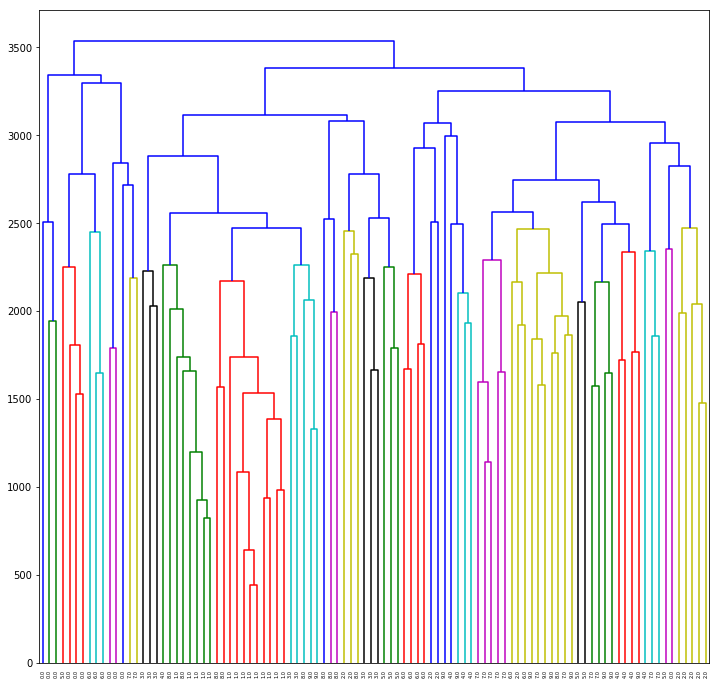

In [66]:
rows = np.arange(60000)
np.random.shuffle(rows)
n_select = 100
Z = linkage(train_img[rows[:n_select]], 'complete')
plt.figure(figsize=(22, 15))
_ = dendrogram(Z,labels = train_lbl[rows[:n_select]].astype('int'),leaf_font_size = 12)
# print(train_lbl[rows[:n_select]])

Based on the above dendrogram (which is only based on 100 images), if we make the cut off point at approximately 3000 on the y-axis (which seems like a reasonable cutting point, we would end up with 10 clusters.

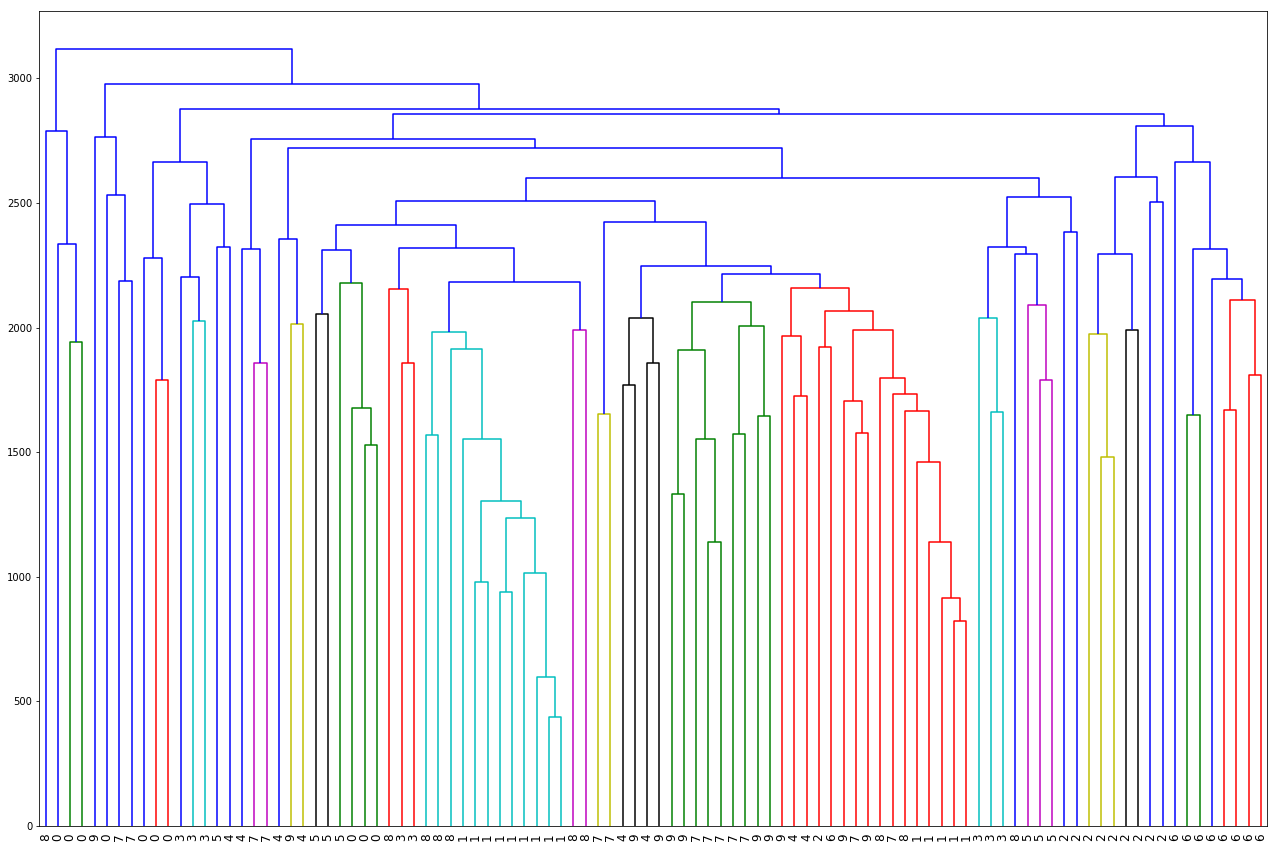

In [82]:
Z = linkage(train_img[rows[:n_select]], 'weighted')
plt.figure(figsize=(22, 15))
_ = dendrogram(Z,labels = train_lbl[rows[:n_select]].astype('int'),leaf_font_size = 12)
# print(train_lbl[rows[:n_select]])

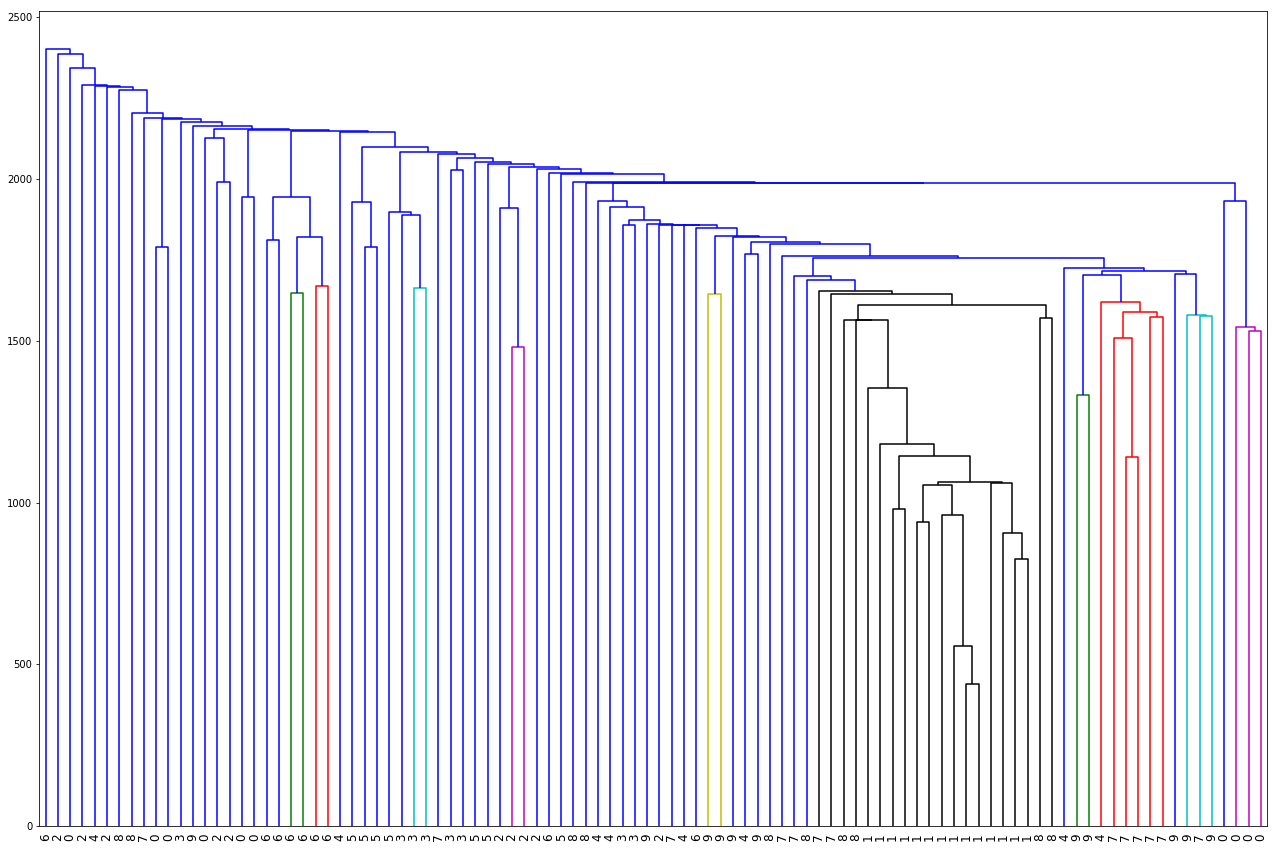

In [83]:
Z = linkage(train_img[rows[:n_select]], 'single')
plt.figure(figsize=(22, 15))
_ = dendrogram(Z,labels = train_lbl[rows[:n_select]].astype('int'),leaf_font_size = 12)
# print(train_lbl[rows[:n_select]])

In [ ]:
#acknowlegements
